<a href="https://colab.research.google.com/github/gwegayhu/dashboards-app/blob/master/Fundamentals_of_Scalable_Data_Science_IBM_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Noteb')

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=80a67f05c9c17b6e799ffc0122069562a40fd752f75d5be5479778dcb742af7c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [ ]:
def getListForHistogramAndBoxPlot(df,spark):
    return df.rdd.map(lambda row: row.temperature).filter(lambda val: val is not None).collect()

In [ ]:
def getListsForRunChart(df,spark):
    result_rdd = df.rdd.map(lambda row : (row.ts,row.temperature)).filter(lambda row: row[1] is not None).sample(False, 0.1)
    result_array_ts = result_rdd.map(lambda row: row[0]).collect()
    result_array_temperature = result_rdd.map(lambda row: row[1]).collect()
    return (result_array_ts, result_array_temperature)

In [ ]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2024-04-25 12:23:29--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/claimed-framework/component-library/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2024-04-25 12:23:30--  https://github.com/claimed-framework/component-library/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/claimed-framework/component-library/raw/master/coursera_ds/washing.parquet [following]
--2024-04-25 12:23:30--  https://github.com/claimed-framework/component-library/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.github

In [ ]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     NULL|      77| NULL|        100|1547808723923|   NULL|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    NULL|      NULL|     NULL|    NULL| 1046|       NULL|1547808729917|   NULL|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    NULL|      NULL|       71|    NULL| NULL|       NULL|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     NULL|      75| NULL|         86|1547808738999|   NULL|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    NULL|      NULL|       75|    NULL| NULL|   

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

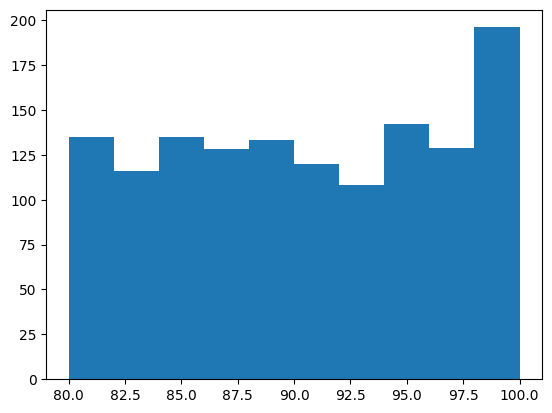

In [ ]:
plt.hist(getListForHistogramAndBoxPlot(df,spark))
plt.show()

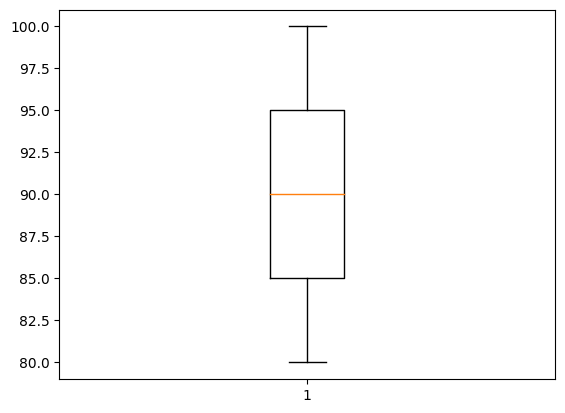

In [ ]:
plt.boxplot(getListForHistogramAndBoxPlot(df,spark))
plt.show()

In [ ]:
lists = getListsForRunChart(df,spark)

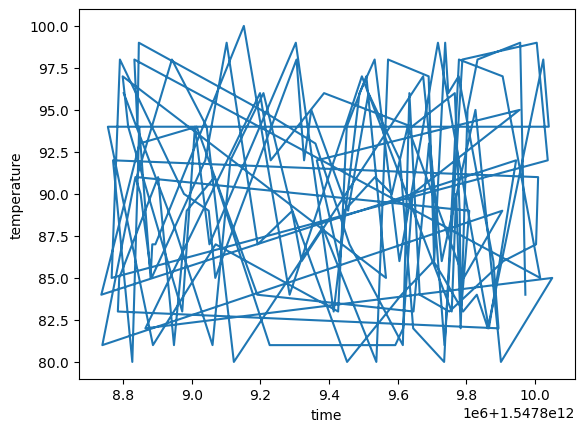

In [ ]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [ ]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2024-04-25 12:26:29--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: ‘rklib.py’

rklib.py            100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-04-25 12:26:29 (35.3 MB/s) - ‘rklib.py’ saved [2540/2540]



In [ ]:
from rklib import submitAll
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = "gwegayhu@gmail.com"
token = "fw0l5cR6xbbWZtL2"


In [ ]:
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot(df, spark))))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot(df, spark)))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart(df, spark))))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart(df, spark)[0]))

In [ ]:
submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"95cS6","id":"sUpST4RAEeawAApvKZgcCQ~95cS6~2hIaUAL_Ee-1Jg4Ha455Ow","courseId":"sUpST4RAEeawAApvKZgcCQ"}],"paging":{},"linked":{}}
-------------------------
